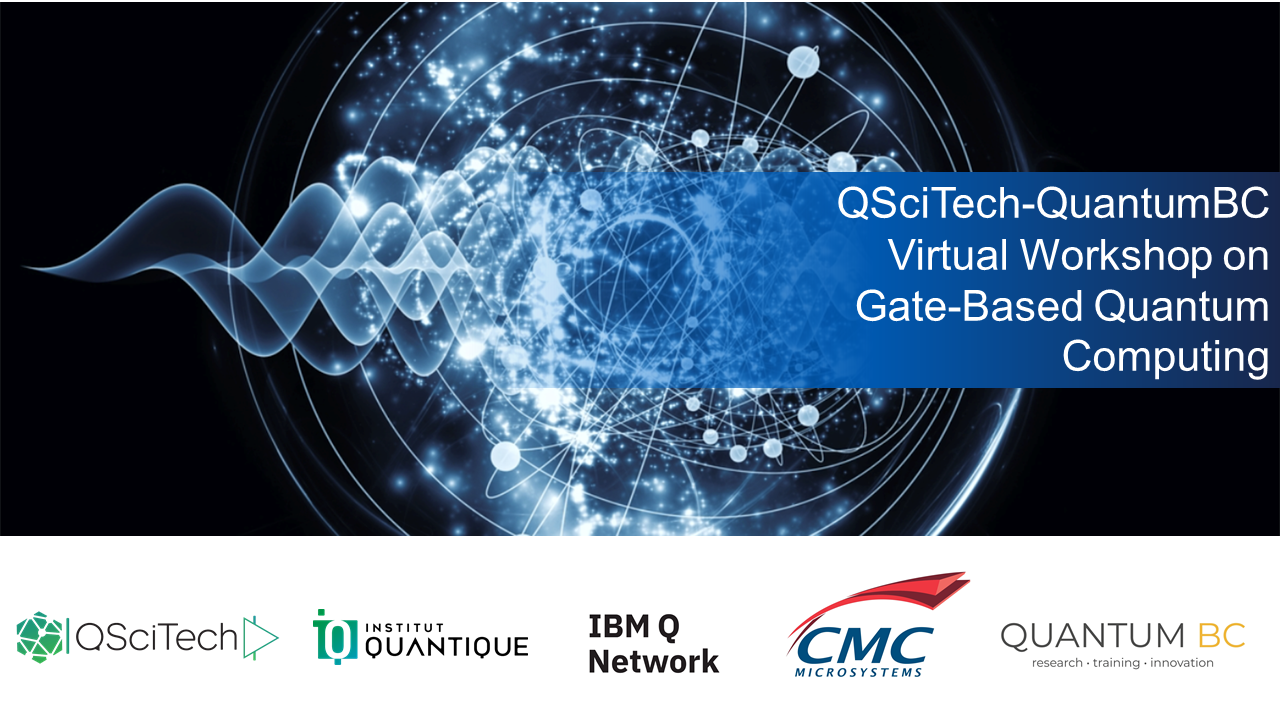

# **QUANTUM CHEMISTRY THEORY**


 **Jean Paul FAYE**

Quantum specialist,

**CMC MICROSYSTEMS**

# **Why this activity**?

The aim of this activity is to show how to transform the Hamiltonian describing the electronic structure of molecules in second quantization form,  which will be used to map to quantum computing operations.

In this transformation, we need to compute one-body and two-body integrals. In this activity, we will learn how to calculate those integrals using `Pyscf` package. 

# **Electronic structure Hamiltonian** 

We consider a molecule composed of $N_n$ nuclei of mass $M_I$ and $N_e$ electrons of mass $m_e$. The Hamiltonian describing this molecule is written as:
\begin{eqnarray}
    H = -\sum^{N_e}_{i=1}\frac{\hbar^2}{2m_e}\nabla^2_i-\sum^{N_n}_{I=1}\frac{\hbar^2}{2M_I}\nabla^2_I -\sum^{N_e,N_n}_{i,I=1}\frac{e^2}{4\pi\epsilon_0}\frac{Z_I}{|{\bf r}_i-{\bf R}_I|} + \frac{1}{2}\sum^{N_e}_{\substack{i,j = 1\\i<j}}\frac{e^2}{4\pi\epsilon_0}\frac{1}{|{\bf r}_i-{\bf r}_j|} + 
    \frac{1}{2}\sum^{N_n}_{\substack{I,J = 1\\I<J}}\frac{e^2}{4\pi\epsilon_0}\frac{Z_IZ_J}{|{\bf R}_I-{\bf R}_J|},
\end{eqnarray}
where the first and second terms are the kinetic energy of electrons and nuclei, respectively. The thirt term is the Coulomb attractive interaction between electrons and nuclei. The two last terms are the electron-electron and nuclei-nuclei interactions, respectively.
In this equation, $\hbar$ is Planck's constant $h$ divided by $2\pi$, and $e$ is the electron charge. To simplify, it is convenient to rewrite the Hamiltonian in **Hartree atomic units**. 

# **How to write the Hamiltonian in Hartree atomic units?**



Let us consider the hydrogen atom, which is composed by one electron and one nucleus. The Schrödinger equation for hydrogen atom is:
\begin{equation}
\left(-\frac{\hbar^2}{2M_I}\nabla^2 -\frac{\hbar^2}{2m_e}\nabla^2 -\frac{e^2}{4\pi\epsilon_0}\frac{1}{{|\bf r|}}\right)\Phi = E\Phi 
\end{equation}
In order to cast this equation into Hartree atomic units, we do the following change of variable: ${\bf r} \rightarrow \lambda {\bf r}^{\prime}$, which transform the Schrödinger equation as follow:
\begin{equation}
\left(-\frac{\hbar^2}{2m_e\lambda^2}\nabla^{\prime 2} -\frac{e^2}{4\pi\epsilon_0\lambda}\frac{1}{{|\bf r^{\prime}|}}\right)\Phi^{\prime} = E\Phi^{\prime}. 
\end{equation}
To factorize the constant in front of the electron kinetic and potential energies, we require that 
\begin{equation}
\frac{\hbar^2}{m_e\lambda^2} = \frac{e^2}{4\pi\epsilon_0\lambda} = E_a,
\end{equation} 
where $E_a$ is the unit of energy called the **Hartree**.
Solving this equation, we obtain $\lambda = \frac{4\pi\epsilon_0\hbar^2}{m_ee^2} = a_0$, where $a_0 = 0.52918\times 10^{-11} $ m is the Bohr radius.
We can write now:
\begin{equation}
\left(-\frac{\nabla^{\prime 2}}{2} -\frac{1}{{|\bf r^{\prime}|}}\right)\Phi^{\prime} = E^{\prime}\Phi^{\prime} 
\end{equation}
with $E^{\prime} = E/E_a$.

Using this procedure, the Hamiltonian of the molecule takes the form
\begin{eqnarray}
    H = -\sum^{N_e}_{i=1}\frac{\nabla^2_i}{2}-\sum^{N_n}_{I=1}\frac{\nabla^2_I}{2M_{I/e}} -\sum^{N_e, N_n}_{i,I = 1}\frac{Z_I}{|{\bf r}_i-{\bf R}_I|} + \frac{1}{2}\sum^{N_e}_{\substack{i,j = 1\\i<j}}\frac{1}{|{\bf r}_i-{\bf r}_j|} + 
    \frac{1}{2}\sum^{N_n}_{\substack{I,J = 1\\I<J}}\frac{Z_I Z_J}{|{\bf R}_I-{\bf R}_J|}
\end{eqnarray}
where $M_{I/e} = M_I/m_e$.

# **Born-Oppenheimer approximation**

As the mass of a nucleus is around one thousand times heavier than the mass of one electron, one can simplify the Hamiltonian by considering the nuclei to be fixed charge points. We end up with a Hamiltonian that describes the motion of electrons in the ion's potential. This is the so-called Born-Oppenheimer approximation. In this approximation, we separate the Hamiltonian of the nuclei part from the electronic part:
\begin{eqnarray}
H = H_n + H_e,
\end{eqnarray}
with the nuclei Hamiltonian defined as:
\begin{eqnarray}
   H_n = -\sum^{N_n}_{I=1}\frac{\nabla^2_I}{2M_{I/e}}   + 
    \frac{1}{2}\sum^{N_n}_{\substack{I,J = 1\\I<J}}\frac{Z_I Z_J}{|{\bf R}_I-{\bf R}_J|},
\end{eqnarray}
and the electronic Hamiltonian
\begin{eqnarray}
    H_e = -\sum^N_{i}\frac{\nabla^2_i}{2} -\sum^N_{i=1}\sum^M_{I=1}\frac{Z_I}{|{\bf r}_i-{\bf R}_I|} + \sum^N_{i=1}\sum_{j\neq i}\frac{1}{|{\bf r}_i-{\bf r}_j|}, 
\end{eqnarray}
is the Hamiltonian of interest.
It is composed by the kinetic energy term $T$ and the electron-electron interaction $V$,
where $T$ and $V$ are defined as:
\begin{eqnarray}
T = \sum^{N_e}_{i= 1}T_i = -\sum^{N_e}_{i= 1}\left(\frac{\nabla^2_i}{2} +\sum^{N_n}_{I=1}\frac{Z_I}{|{\bf r}_i-{\bf R}_I|}\right),  \\ V = \sum^{N_e}_{i=1}\sum_{j>i}V({\bf r}_i, {\bf r}_j) = \sum^{N_e}_{i=1}\sum_{j>i}\frac{1}{|{\bf r}_i-{\bf r}_j|}.
\end{eqnarray}

The total wavefunction is also seperated $\Psi({\bf R}, {\bf r}) = \Phi_n({\bf R})\psi_e({\bf R}, {\bf r})$. Thus, in the Born-Oppenheimer approximation, the electronic structure of the molecule is obtained by solving the Schrödinger equation
\begin{equation}
H_e \psi_e({\bf R}, {\bf r}) = E_e({\bf R}) \psi_e({\bf R}, {\bf r})
\end{equation}
for a fixed nuclear configuration ${\bf R}$. 





# **Many-electron wavefucntion and single-particle wave function**

In the absence of electron-electron interaction, the electronic Hamiltonian $H_e$ is given by the sum of single-electron Hamiltonians. Thus, the $N_e$-electron wavefunction can be written as the product of the eigenfunctions $\phi_j$ of the single-electron Hamiltonian. In this case, the many-electron wavefunction takes the form
\begin{equation}
\psi_e^\prime ({\bf x}) = \prod_{j=1}^{N_e} \phi_j({\bf x}_j)= \phi_1({\bf x}_1)\phi_2({\bf x}_2) \ldots \phi_{N_e}({\bf r}_{N_e}).
\end{equation}
The basis states for the $N_e$-electron system can be built from the complete orthonormal single-particle basis $\{ \phi_j({\bf x}_j)\}$,
\begin{equation}
\sum_j\phi^*_j({\bf x}_j^{\prime})\phi_j({\bf x}_j) = \delta({\bf x}_j- {\bf x}^{\prime}_j) ~ ~ ~ \text{and}~ ~ ~ \int d {\bf x}~\phi_i^*({\bf x}_i)\phi_j({\bf x}_j) = \delta_{i,j},
\end{equation}
where ${\bf x}_i = ({\bf r}_i, \sigma_i)$ describing both spatial position ${\bf r}_i$ and spin $\sigma_i = \uparrow, \downarrow $ of an electron.

However, the wavefucntion $\psi_e^\prime ({\bf x})$ it is not anti-symmetric, i.e., if we interchange any two of the electron coordinates ${\bf x}_i$, the wavefunction does not change signal. For electrons, the wavefunction must be antisymetric, and we can write $\psi_e^\prime({\bf x})$ in a antisymetrized way by acting the fermionic anti-symmetrization operator $A$ on $\psi_e^\prime ({\bf x})$:
\begin{equation}
A\psi_e^\prime ({\bf x}) = \frac{1}{\sqrt{N_e!}}
\begin{vmatrix}
\phi_{1}({\bf x}_1) & \phi_{1}({\bf x}_2) & \cdots & \phi_{1}({\bf x}_{N_e}) \\ 
\phi_{2}({\bf x}_1) & \phi_{2}({\bf x}_2) & \cdots & \phi_{2}({\bf x}_{N_e}) \\ 
\cdots & \cdots & \cdots & \cdots \\ 
\phi_{N_e} ({\bf x}_1) & \phi_{N_e}({\bf x}_2) & \cdots & \phi_{N_e}({\bf x}_{N_e})
\end{vmatrix} = \langle {\bf x}|\phi_{1}\phi_{2}\cdots\phi_{N_e}\rangle,
\end{equation}
which is known as the **Slater determinant** .

In the presence of electron-electron interaction, $\psi_e^\prime ({\bf x})$ is no longer an eigenfunction of $H_e$. However, as $\psi_e^\prime ({\bf x})$ forms a complete set, the $N_e$-electron wavefucntion can be expanded in terms of Slater determinants
\begin{equation}
\psi_e({\bf x})= \sum_{j} c_j \psi_e^\prime (j,{\bf x}), 
\end{equation}
where $j = 1, \ldots, N_o$ (number of orbitals) denotes the various states $\phi_j$ that can exist in a determinant.  

# **Operators in first quantization**



*   **One-electron operators**

The one-electron operators defined on single-particle states described by the coordinate ${\bf x}_j$ can be writen as:
\begin{equation}
T = \sum^{N_e}_{j=1}T_j = \sum^{N_e}_{j=1}\sum_{kl}T_{kl}|\phi_k({\bf x}_j)\rangle\langle\phi_l({\bf x}_j)| ~~ \text{with} ~~ T_{kl} = \int d{\bf x}_j\phi^*_l({\bf x}_j)T({\bf x}_j)\phi_k({\bf x}_j)
\end{equation}

*   **Two-electron operators**

The two-electron operators defined on single-particle states described by the coordinates ${\bf x}_j$ and ${\bf x}_i$ can be writen as:
\begin{equation}
V = \frac{1}{2}\sum^{N_e}_{i,j\neq i = 1}V_{ij} = \frac{1}{2}\sum^{N_e}_{i,j\neq i = 1}\sum_{klmn}V_{klmn}|\phi_m({\bf x}_i)\rangle|\phi_n({\bf x}_j)\rangle\langle\phi_k({\bf x}_j)|\langle\phi_l({\bf x}_i)|,
\end{equation}
with,
\begin{equation}
V_{klmn} = \int d{\bf x}_j\phi^*_m({\bf x}_i)\phi^*_n({\bf x}_j)V({\bf x}_i-{\bf x}_j)\phi_k({\bf x}_i)\phi_l({\bf x}_j)
\end{equation}


# **Occupation number representation**

We showed that total electron wavefunction can be written as a linear combination of Slater determinantes. Slater determinants are very cumbersome to work, even in the absence of interactions. However, to simplify the description of $\psi_e$, we can use the **occupation number representation**. In the occupation number representation, we list the number of electrons, $n_{j}$, in each occupied state $\phi_j$. 

In this representation, we write $\psi^{\prime}_e$ as  $|n\rangle = |n_{N_o},n_{N_o-1},\cdots, n_{1}\rangle$. For electrons, $n_{j} $=$ 1$ if $\phi_{j}$ is occupied and $n_{j} $=$ 0$ if $\phi_{j}$ is empty. The vector $|n\rangle$ is called the occupation number vector and the space of all such vectors is known as Fock space. The second quantization defines **creation** and **annihilation** operators to manipulate this occupation number vector. 

# **Creation and Annihilation operators**

In the second quantization description, creation $c^{\dagger}_j$ and annihilation $c_j$ operators are defined to manipulate the state $|n\rangle$. The operator $n_j = c^{\dagger}_j c_j$ gives the number of electron at orbital $\phi_j$. The creation and annihilation operators satisfy the anti-commutation relations:
\begin{equation}
\{c_i,c^{\dagger}_j\} = \delta_{i,j}, ~~~~ \{c_i,c_j\} = 0,~~~~\{c^{\dagger}_i,c^{\dagger}_j\} = 0.
\end{equation}

The action of $c^{\dagger}_j$ is to create an electron at $\phi_j$,  and $c_j$ annihilates an electron at $\phi_j$. Their action on the state  $|n\rangle$ is as follow:
\begin{equation}
c_j|n_{N_o},n_{N_o-1},\cdots,n_j, \cdots n_1\rangle = \delta_{n_j,1}(-1)^{\sum^{j-1}_{i=1}n_i}|n_{N_o},n_{N_o-1},\cdots,0, \cdots n_1\rangle \\
c^{\dagger}_j|n_{N_o},n_{N_o-1},\cdots,n_j, \cdots n_1\rangle = \delta_{n_j,0}(-1)^{\sum^{j-1}_{i=1}n_i}|n_{N_o},n_{N_o-1},\cdots,1, \cdots n_1\rangle \\
n_j |n_{N_o},n_{N_o-1},\cdots,n_j, \cdots n_1\rangle = n_j|n_{N_o},n_{N_o-1},\cdots,n_j, \cdots n_1\rangle
\end{equation} 

We identify the first and second quantized basis states as:
\begin{equation}
A |\phi_{{N_o}}({\bf x}_{N_o})\rangle |\phi_{{N_o-1}}({\bf x}_{N_o-1})\rangle  \ldots |\phi_{1}({\bf x}_1)\rangle = c^{\dagger}_{{N_o}} c^{\dagger}_{{N_o-1}}  \dots c^{\dagger}_{1}|00\ldots 0\rangle
\end{equation}

# **Form of operators in second quantization**

In second quantization all operators can be expressed in terms of creation and annihilation operators.

**One-body operators**

Let us construct the representation of the one-body operator $T$, using:
 \begin{equation}
A |\phi_{{N_o}}({\bf x}_{N_o})\rangle   \ldots |\phi_{1}({\bf x}_1)\rangle = c^{\dagger}_{{N_o}}  \dots  c^{\dagger}_{1}|0\rangle
\end{equation}


\begin{equation}
T|\phi_{{N_o}}({\bf x}_{N_o})\rangle \ldots |\phi_{1}({\bf x}_1)\rangle = \sum^{N_o}_{j = 1}\sum_{kl}T_{kl}\delta_{lj}|\phi_{{N_o}}({\bf x}_{N_o})\rangle \ldots |\phi_{k}({\bf x}_j)\rangle \ldots \phi_{1}({\bf x}_1)\rangle \\
T|c^{\dagger}_{{N_o}} \dots  c^{\dagger}_{1}|0\rangle = \sum_{kl}T_{kl}\sum^{N_o}_{j=1} \delta_{lj}c^{\dagger}_{{N_o}} \dots c^{\dagger}_{k} \dots c^{\dagger}_{1}|0\rangle
\end{equation}
To make the kets on the two sides of the equation look alike, we will reinsert $c^{\dagger}_j$ at position $j$. The $\phi_j$ may appear, say, $p$ times leading to a contribution of $(c^{\dagger}_{j})^p|0\rangle$ on the left and $c^{\dagger}_{k}(c^{\dagger}_{j})^{p-1}|0\rangle = c^{\dagger}_{k}(\frac{1}{p}c_jc^{\dagger}_{j})(c^{\dagger}_{j})^{p-1}|0\rangle = (\frac{1}{p}c^{\dagger}_{k}c_j)(c^{\dagger}_{j})^{p}|0\rangle$ on the right. We find that:
\begin{equation}
T(|c^{\dagger}_{{N_o}} \dots  c^{\dagger}_{1}|0\rangle) = \sum_{kl}T_{kl}c^{\dagger}_{k}c_l(c^{\dagger}_{{N_o}} \dots c^{\dagger}_{1}|0\rangle),
\end{equation}
since $\sum^{N_o}_{j=1} \frac{1}{p}\delta_{lj} = 1$. This result is valid for any basis states:
 \begin{equation}
T = \sum_{kl}T_{kl}c^{\dagger}_{k}c_l ~~ \text{with} ~~ T_{kl} =-\int d {\bf x}~\phi^*_{k}({\bf x}) \frac{\nabla^2}{2}\phi_{l}({\bf x}) -\int d {\bf x}~\phi^*_{k}({\bf x})\sum^M_{I=1}\frac{1}{|{\bf r}-{\bf R}_I|}\phi_{l}({\bf x})
\end{equation}
Remember that $\phi_{j}({\bf x}) = \varphi_{j}({\bf r})~\chi_\sigma$, where $\sigma = \uparrow, \downarrow$ defines the spin-orbital states.

**Two-body operators** 

Following the similar procedure as in one-body term, the two-body term can be written as:
\begin{equation}
V = \sum_{ijkl} V_{ijkl} c^{\dagger}_{i}c^{\dagger}_{j}c_{k}c_{l} \end{equation} 
with
\begin{equation}  V_{ijkl} = \int d {\bf x_1}d {\bf x_2}~\phi^*_{i}({\bf x_1}) \phi^*_{j}({\bf x_2}) \frac{1}{|{\bf x_1}-{\bf x_2}|}\phi_{k}({\bf x_2}) \phi_{l}({\bf x_1})  
\end{equation}